In [15]:
import numpy as np
import argparse
import time
import os
import sys
import pickle
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

from datasets import inputs, sf_inputs_discrete
from sr_model.models.models import AnalyticSR, STDP_SR, OjaRNN, Linear
import configs
from eval import eval

device = 'cpu'

In [48]:
with open('../trained_models/03_oja_sf_gradients/td_gradient_update.p', 'rb') as f:
    td_data = pickle.load(f)

In [49]:
with open('../trained_models/03_oja_sf_gradients/simplif_gradient_update.p', 'rb') as f:
    simplif_data = pickle.load(f)

In [50]:
with open('../trained_models/03_oja_sf_gradients/oja_baseline.p', 'rb') as f:
    oja_data = pickle.load(f)

In [51]:
with open('../trained_models/03_oja_sf_gradients/rnn_baseline.p', 'rb') as f:
    rnn_data = pickle.load(f)

In [52]:
smooth_amt = 10

In [53]:
td_dist = td_data['autodiff_dist']
td_dist['Step'] = np.floor(td_dist['Step']/smooth_amt)*smooth_amt

In [54]:
simplif_dist = simplif_data['autodiff_dist']
simplif_dist['Step'] = np.floor(simplif_dist['Step']/smooth_amt)*smooth_amt

# Gradient Alignment

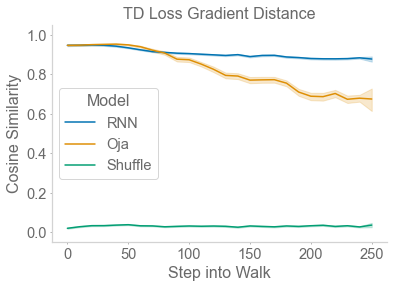

In [55]:
plt.figure()
sns.lineplot(x='Step', y='Distance', hue='Model', data=td_dist)
plt.ylim(-0.05, 1.05)
plt.ylabel('Cosine Similarity')
plt.xlabel('Step into Walk')
plt.title('TD Loss Gradient Distance')
plt.show()

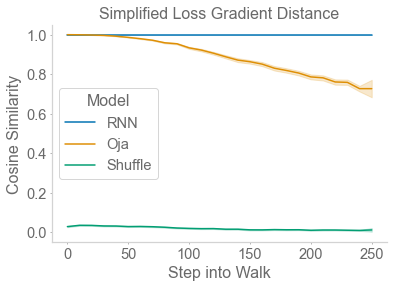

In [56]:
plt.figure()
sns.lineplot(x='Step', y='Distance', hue='Model', data=simplif_dist)
plt.ylim(-0.05, 1.05)
plt.ylabel('Cosine Similarity')
plt.xlabel('Step into Walk')
plt.title('Simplified Loss Gradient Distance')
plt.show()

# Final Test TD Loss

In [57]:
td_losses = []
grad_types = []

td_losses.extend([x.item() for x in td_data['test_losses']])
grad_types.extend(['TD Loss']*len(td_data['test_losses']))
td_losses.extend([x.item() for x in simplif_data['test_losses']])
grad_types.extend(['Simplif. Loss']*len(simplif_data['test_losses']))
td_losses.extend([x for x in rnn_data['test_losses']])
grad_types.extend(['RNN Update']*len(rnn_data['test_losses']))
td_losses.extend([x for x in oja_data['test_losses']])
grad_types.extend(['Oja Update']*len(oja_data['test_losses']))

data = pd.DataFrame({'Test TD Loss': td_losses, 'Gradient Update': grad_types})

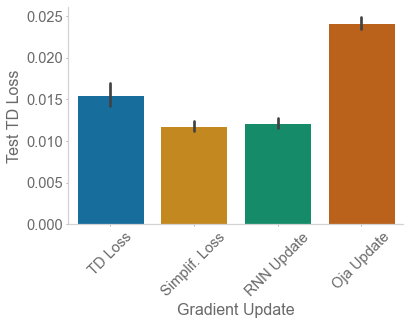

In [58]:
plt.figure()
ax = sns.barplot(x='Gradient Update', y='Test TD Loss', data=data)
for label in ax.get_xticklabels():
    label.set_rotation(45)
plt.show()

# Visual Examples of Gradient

In [89]:
data = td_data

In [90]:
data['saved_grads'].keys()

dict_keys([97, 98, 99])

In [91]:
key = 99
steps = data['saved_grads'][key]['steps']
bp = data['saved_grads'][key]['bp']
rnn = data['saved_grads'][key]['rnn']
oja = data['saved_grads'][key]['oja']

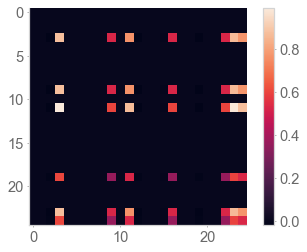

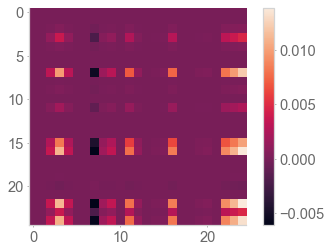

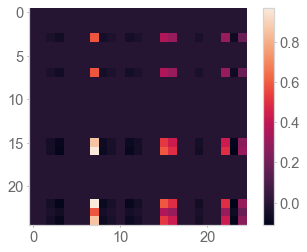

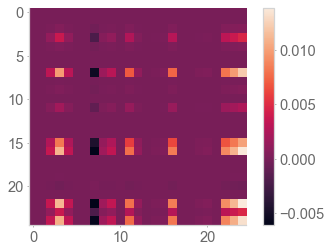

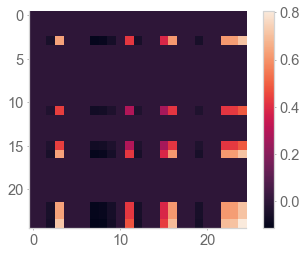

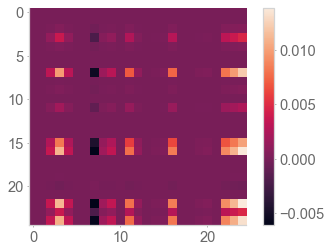

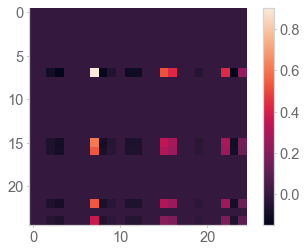

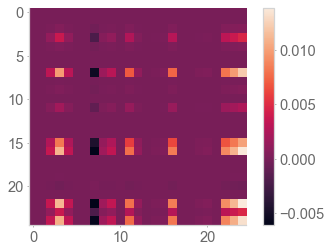

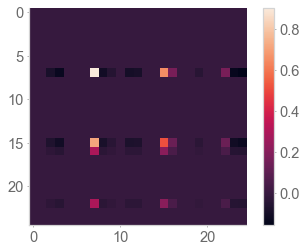

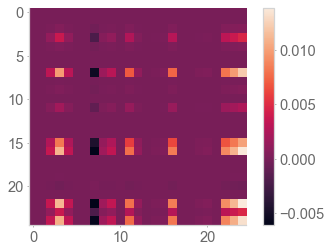

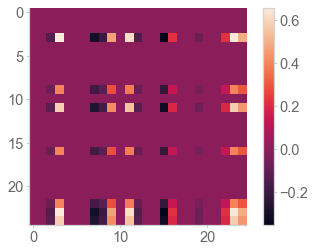

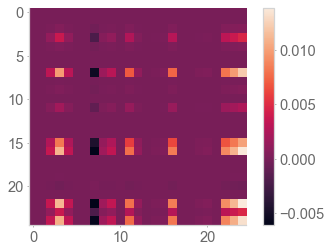

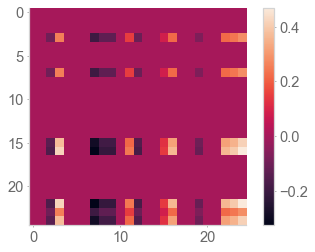

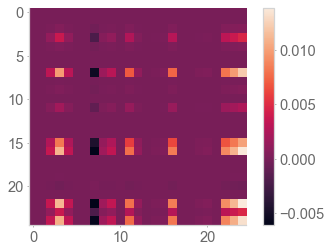

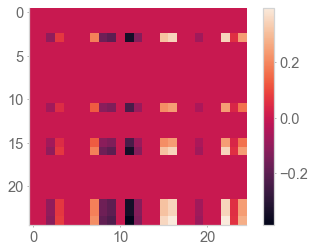

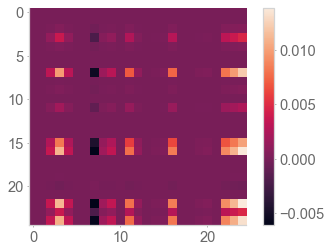

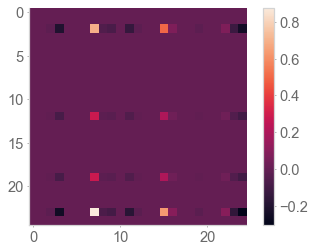

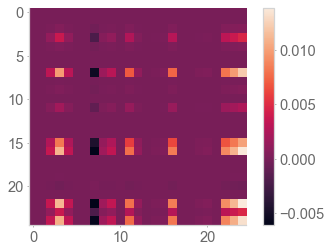

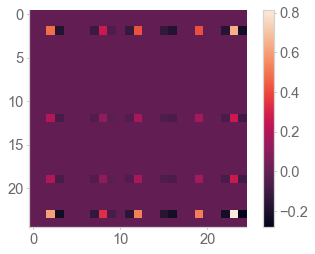

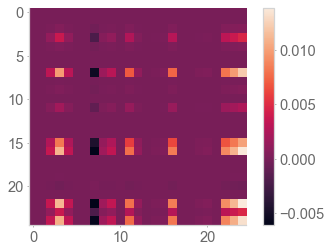

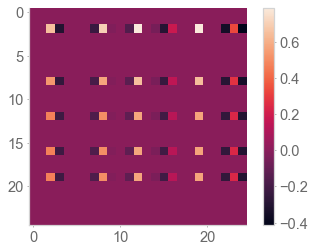

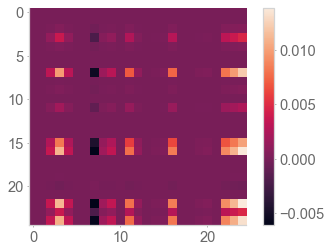

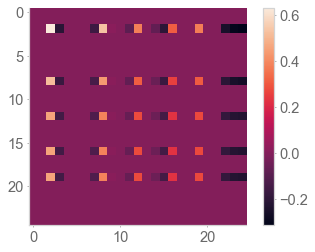

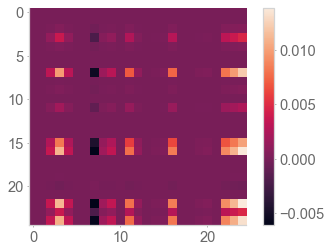

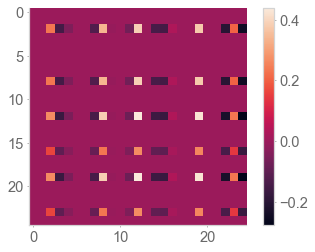

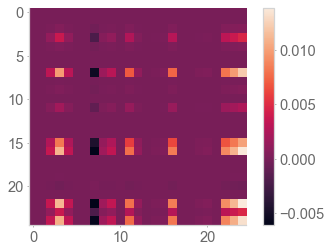

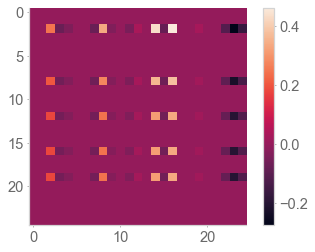

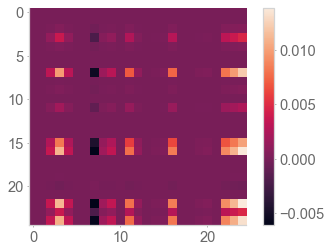

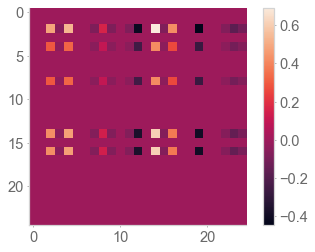

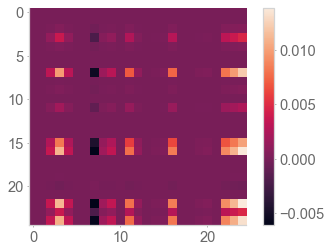

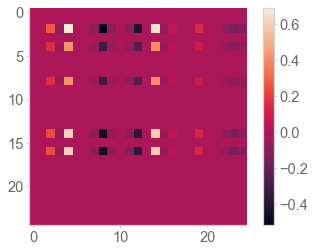

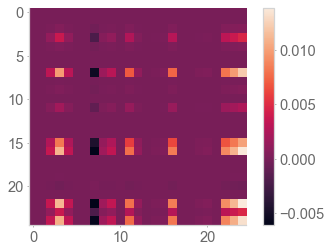

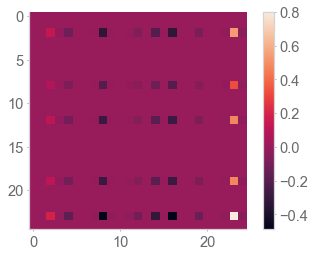

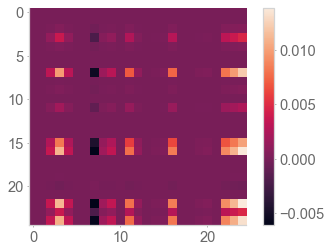

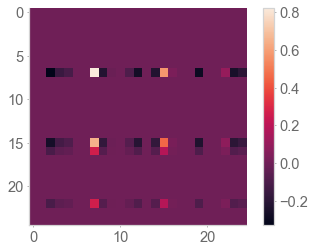

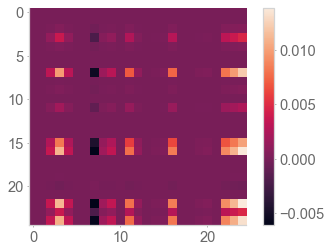

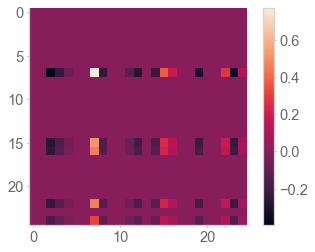

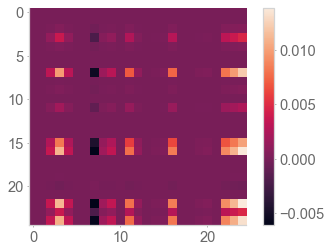

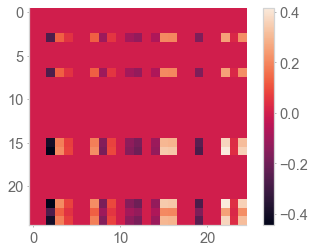

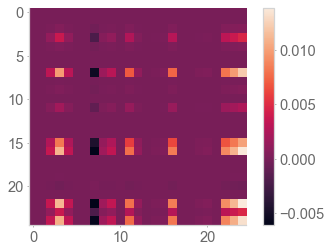

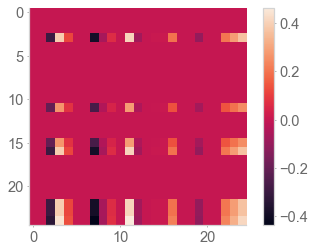

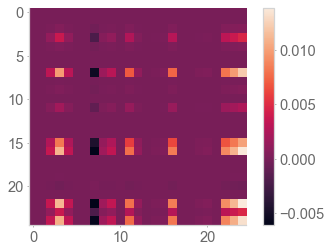

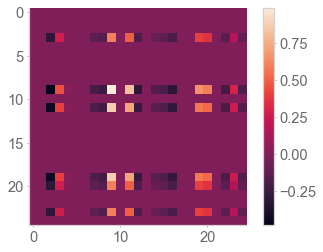

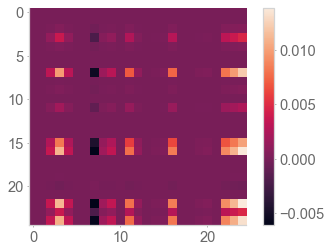

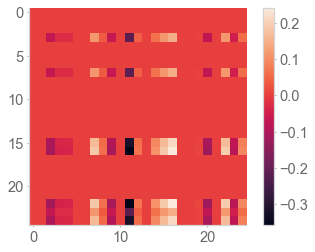

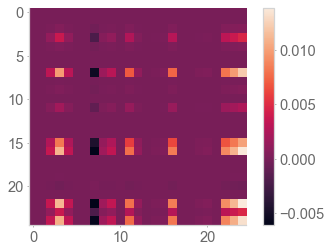

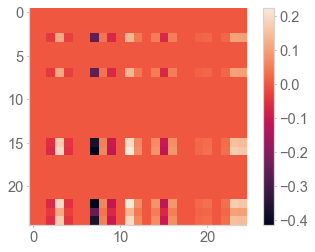

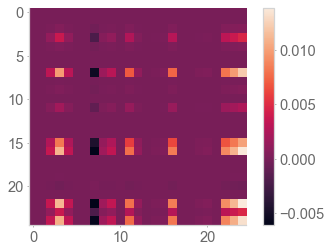

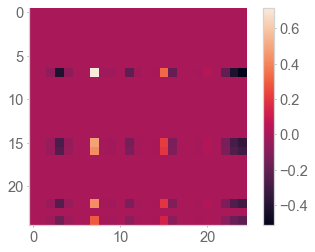

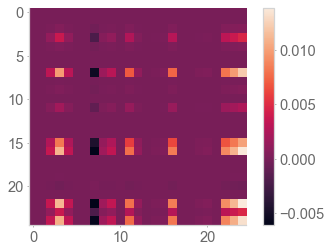

In [98]:
for idx in range(25):
    plt.figure()
    plt.imshow(rnn[idx])
    plt.colorbar()
    plt.show()
    plt.figure()
    plt.imshow(bp[idx])
    plt.colorbar()
    plt.show()
    print()
    print()

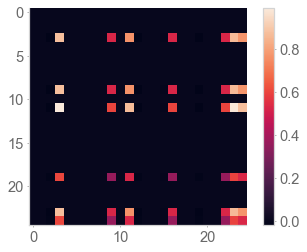

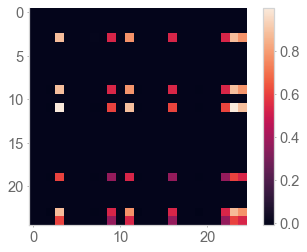

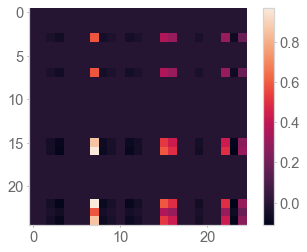

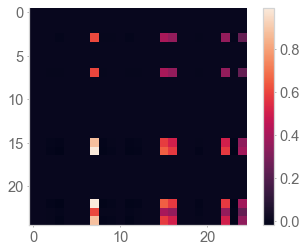

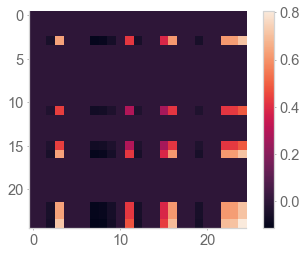

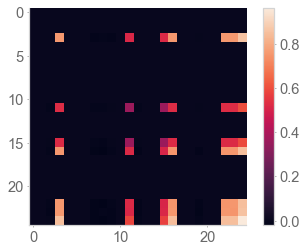

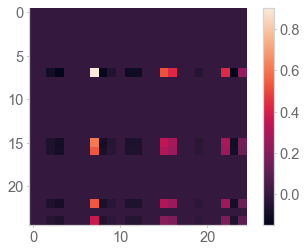

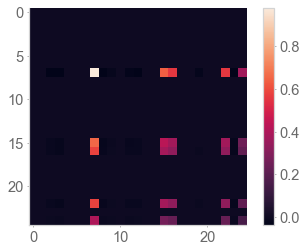

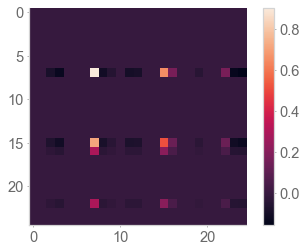

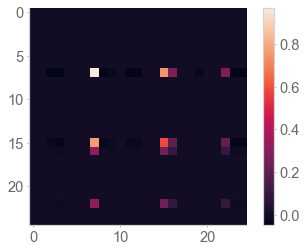

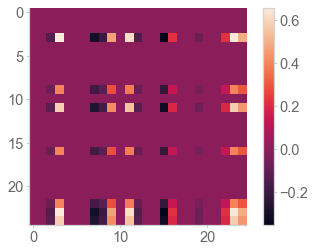

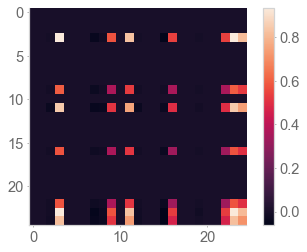

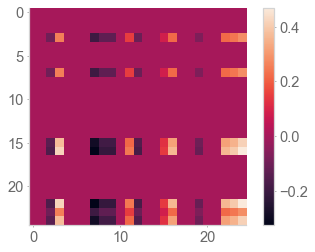

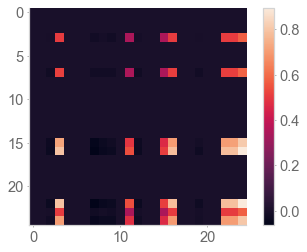

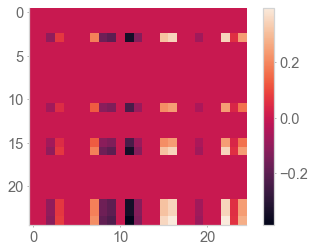

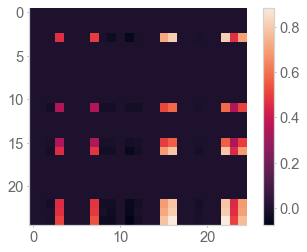

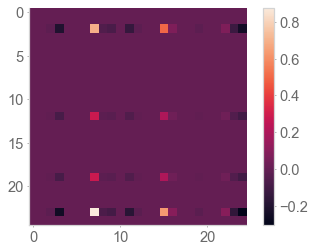

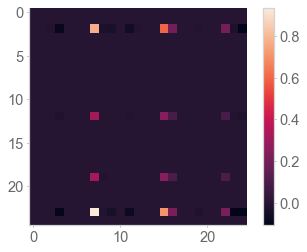

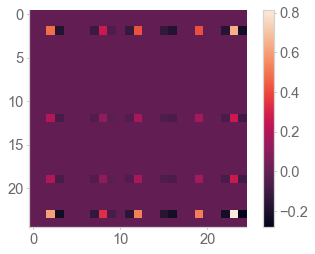

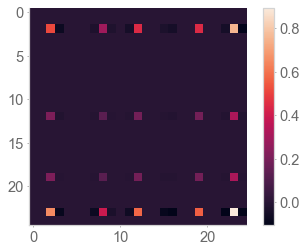

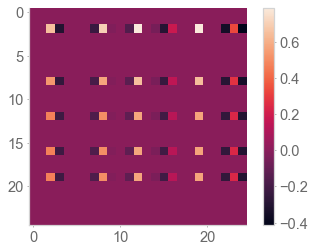

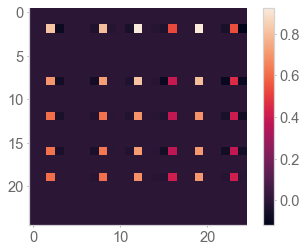

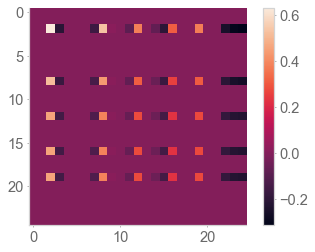

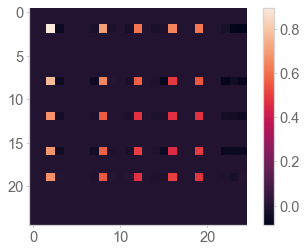

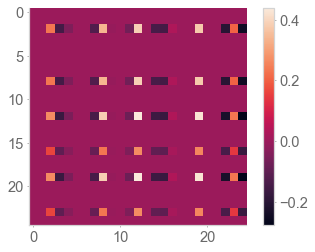

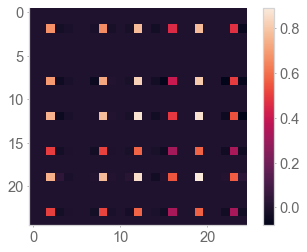

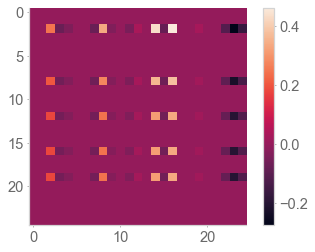

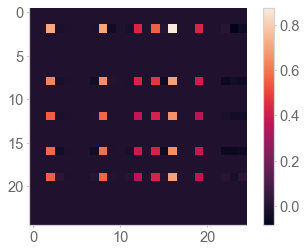

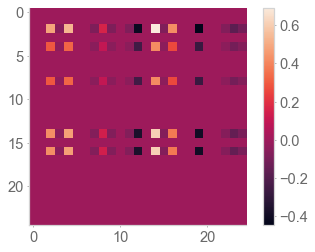

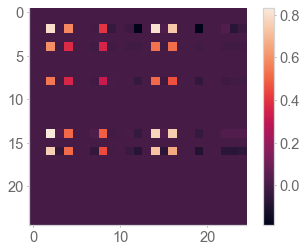

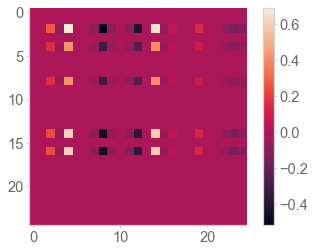

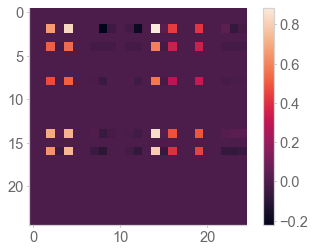

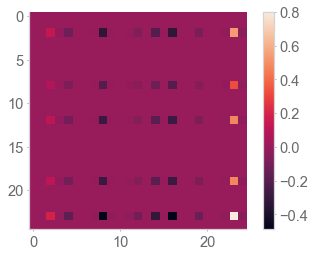

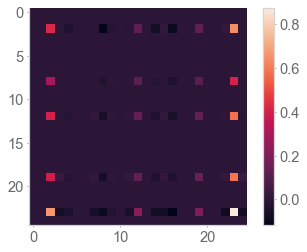

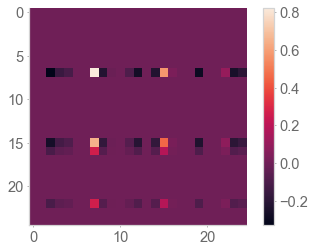

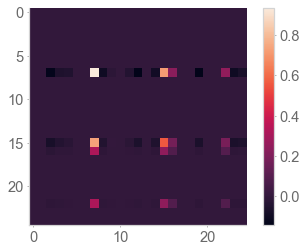

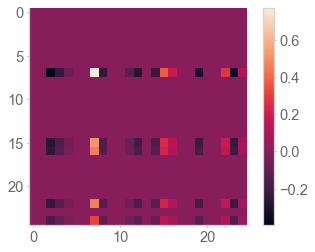

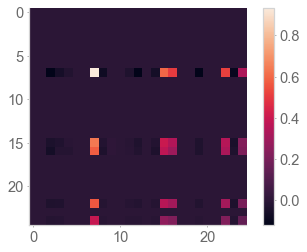

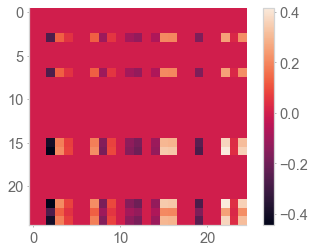

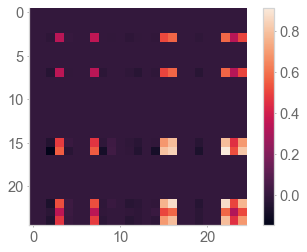

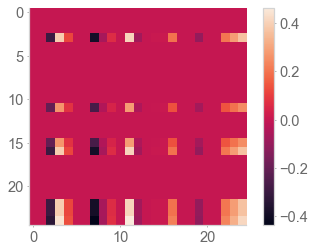

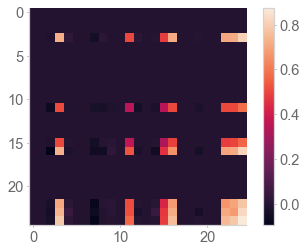

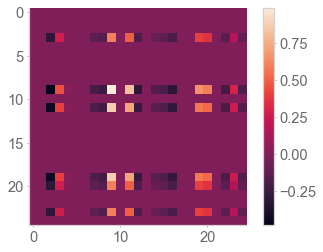

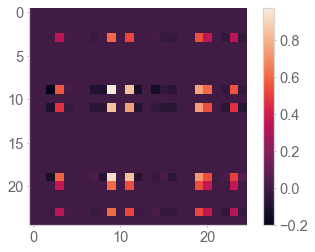

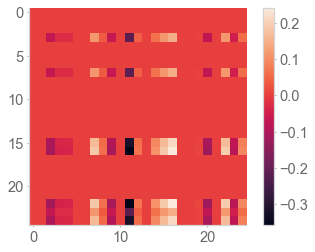

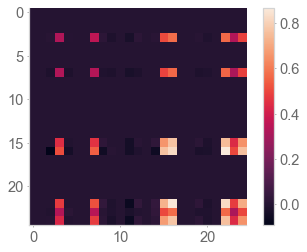

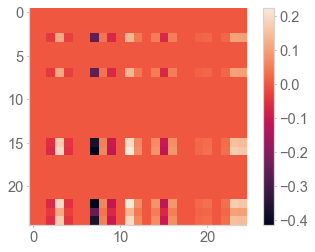

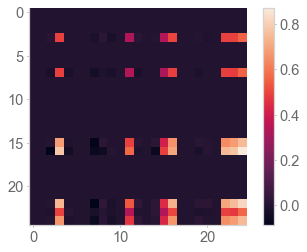

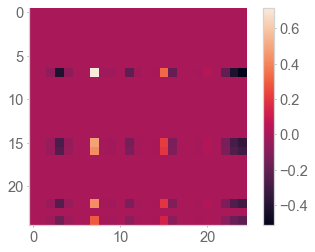

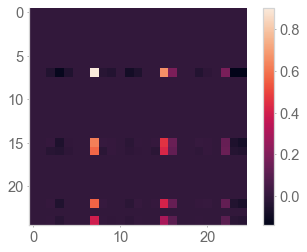

In [95]:
for idx in range(25):
    plt.figure()
    plt.imshow(rnn[idx])
    plt.colorbar()
    plt.show()
    plt.figure()
    plt.imshow(oja[idx])
    plt.colorbar()
    plt.show()
    print()
    print()

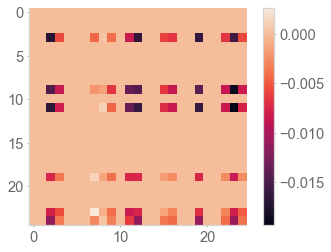

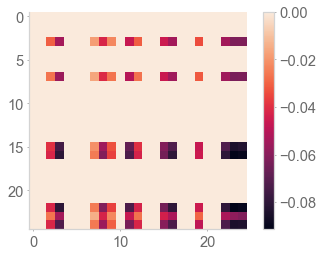

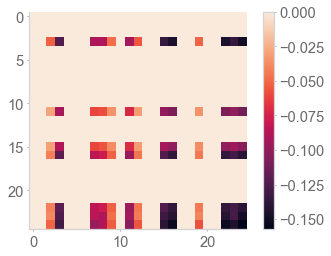

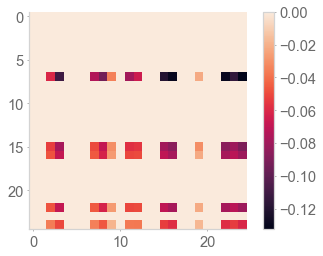

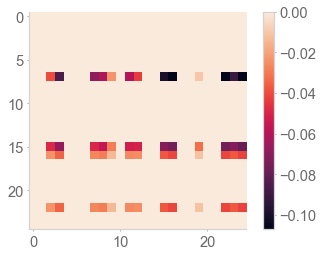

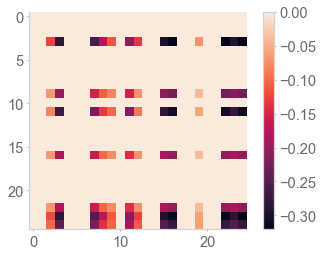

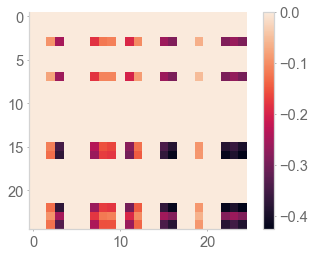

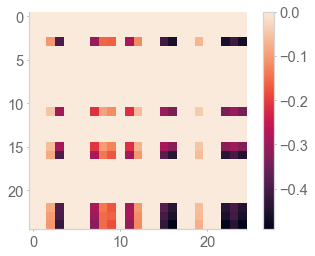

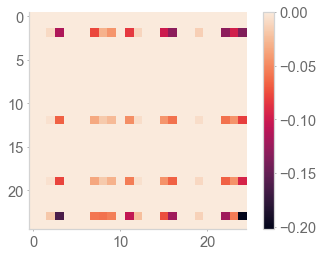

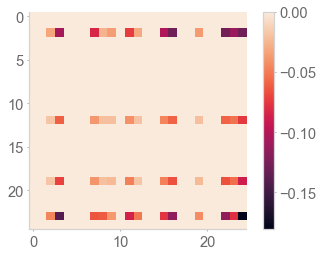

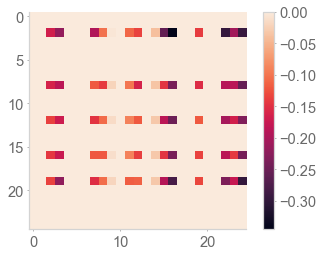

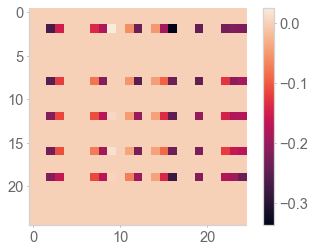

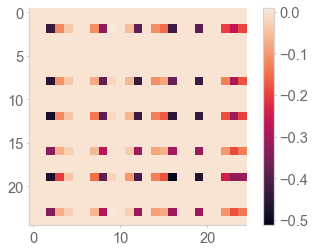

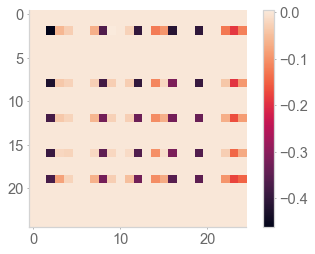

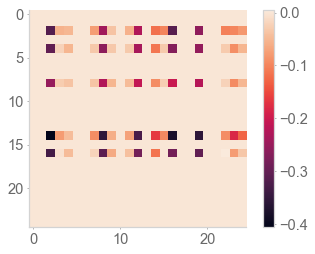

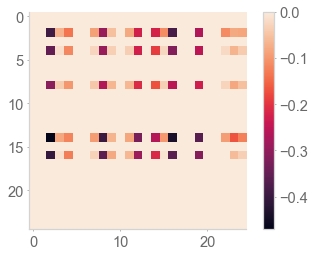

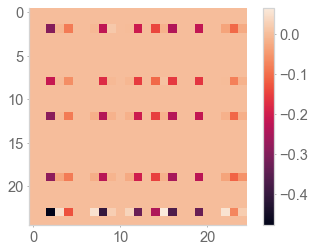

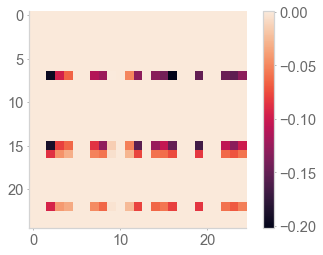

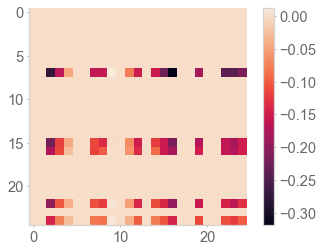

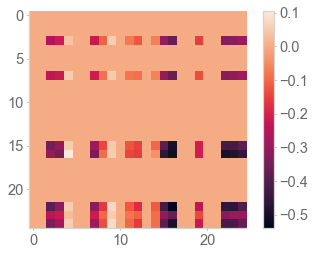

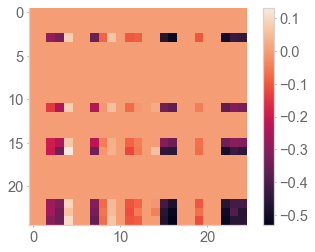

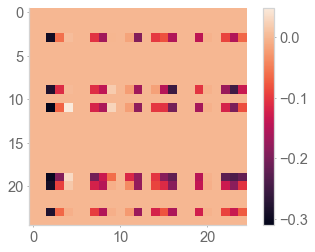

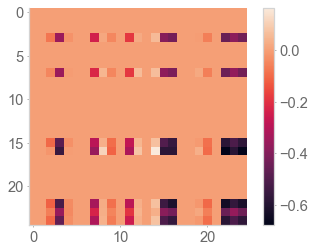

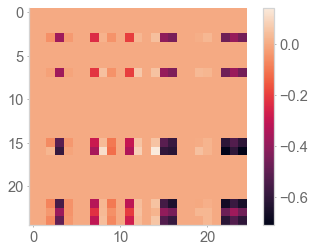

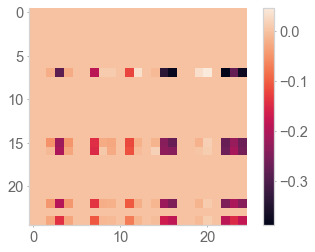

In [97]:
for idx in range(25):
    plt.figure()
    plt.imshow(rnn[idx]-oja[idx])
    plt.colorbar()
    plt.show()

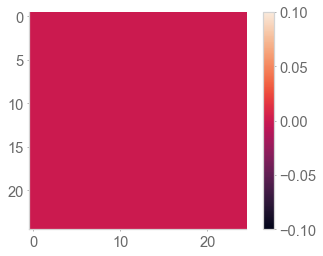

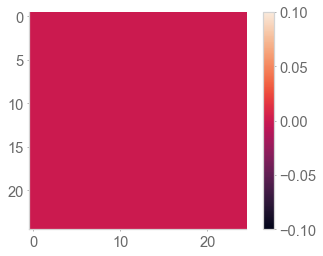

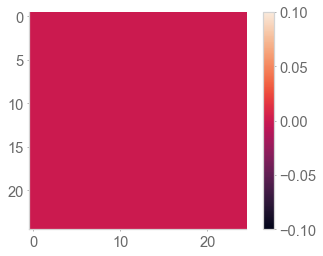

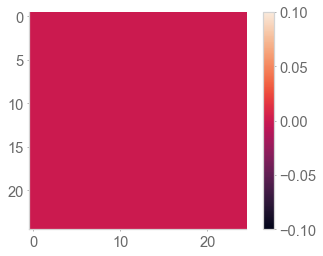

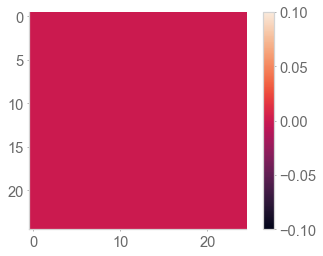

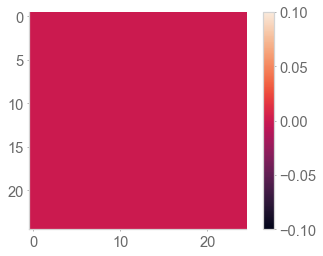

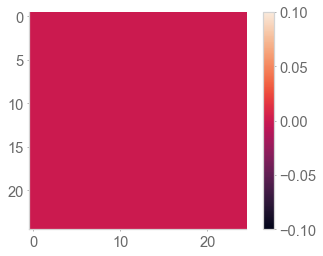

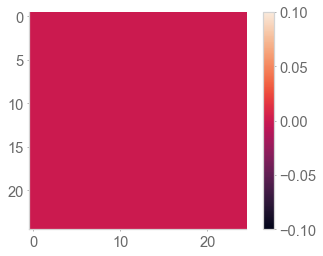

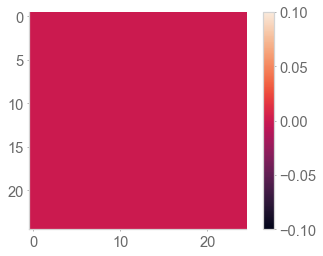

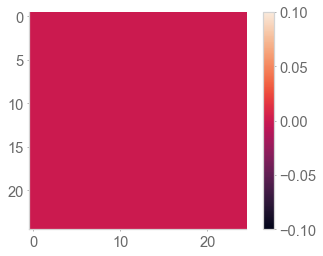

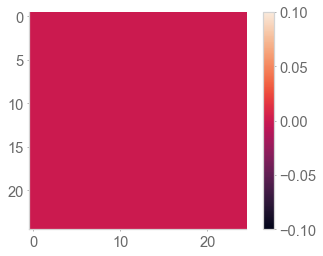

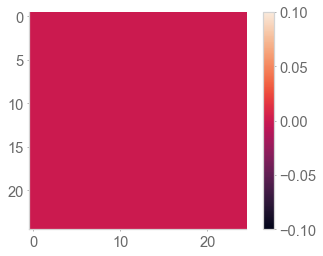

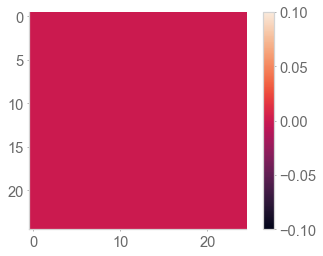

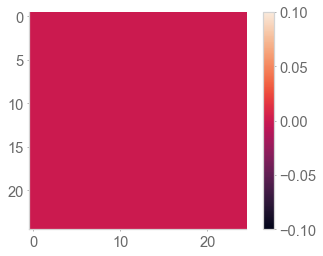

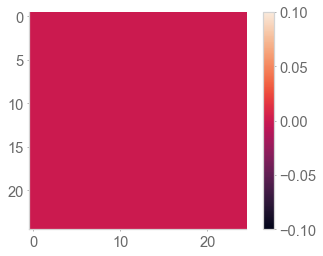

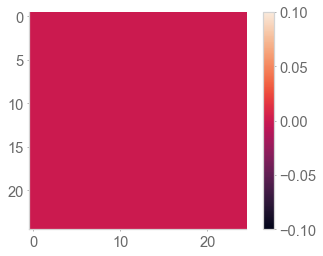

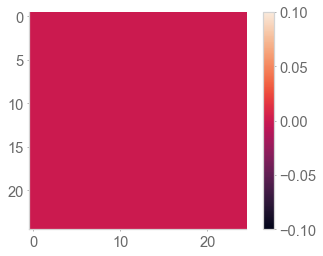

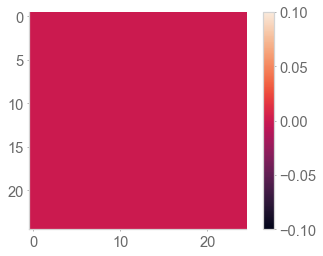

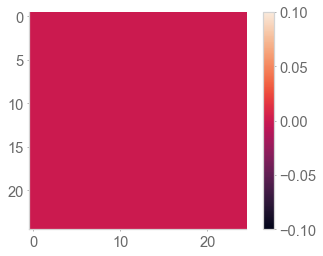

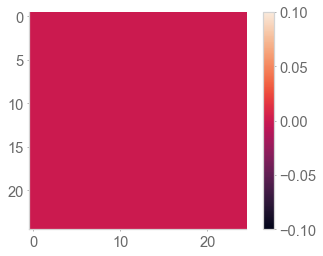

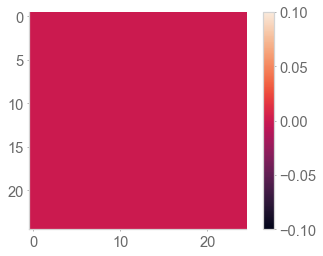

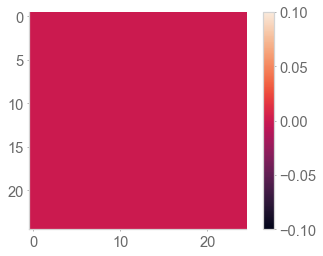

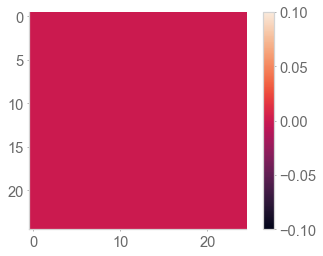

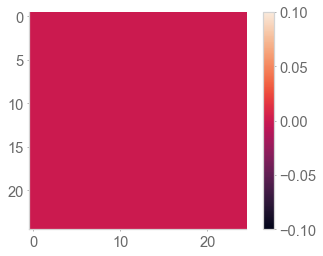

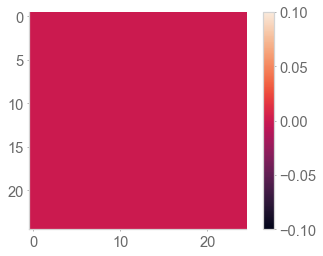

In [96]:
for idx in range(25):
    plt.figure()
    plt.imshow((rnn[idx]!=0).astype(int)-(oja[idx]!=0).astype(int))
    plt.colorbar()
    plt.show()